# TSF: GRIP 

### Task 2: To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

We will first Import and Analyse the dataset as follows:

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
scores = pd.read_csv("http://bit.ly/w-data")

scores.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
scores.shape

(25, 2)

In [45]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [47]:
#Check if there are null values
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

The given dataset has no null values


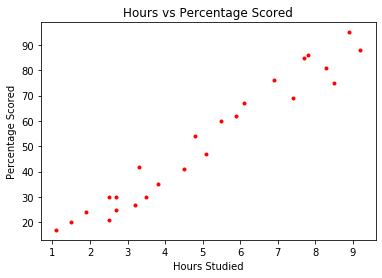

In [48]:
#Scatter Plot of the given Data-Set
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage Scored')
plt.scatter(scores.Hours, scores.Scores, color = 'red', marker = '.')

#### Thus here we can see that clearly, There is a positive linear relation between the Number of Hours studied vs. Percentage Scored 

In [49]:
a = scores.corr()
a

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Thus here we can observe that there is a strong correlation which is also positive

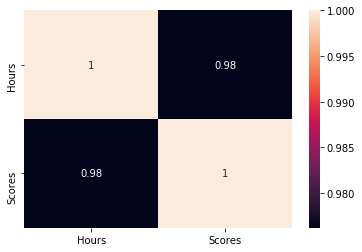

In [50]:
#plotting correlation heat map
sns.heatmap(a,annot = True)

### Training the Data

In [51]:
X = scores.iloc[:, :-1].values  
Y = scores.iloc[:, 1].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,)

### Performing Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
#Predicting the Test Set Result
y_pred = reg.predict(X_test)
print(y_pred)


[17.99485987 59.91708357 29.4281936  37.0504161  78.01986199]


In [75]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.994860
1,62,59.917084
2,25,29.428194
3,30,37.050416
4,86,78.019862


In [76]:
reg.intercept_

3.7031926964091824

In [77]:
reg.coef_

array([9.52777811])

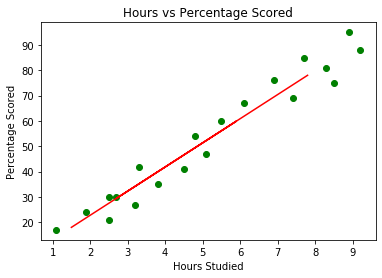

In [78]:
# Plotting the regression line for test data
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage Scored')
plt.scatter(X_train, Y_train, color = 'green')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

In [85]:
#Predicting for given value
pred = reg.predict([[9.25]])
pred

array([91.83514025])

In [86]:
#Calculating the R-Squared value/Accuracy and Mean Absolute Error
from sklearn import metrics
print('R^2 Square:', metrics.r2_score(Y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

R^2 Square: 0.9560887809915896
Mean Absolute Error: 4.709360855046657


### Thus, We observe that according to our model if a student studies for 9.25 hours, His score will be 91.83% 